<a href="https://colab.research.google.com/github/iswaryajeni/Data_Science/blob/main/Icecream.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Ice Cream.csv")
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   Temperature  Revenue
0         24.6      535
1         26.1      626
2         27.8      661
3         20.6      488
4         11.6      317


In [10]:
print("\nDataset Summary:")
print(df.describe())
print("\nData Info:")
print(df.info())


Dataset Summary:
       Temperature      Revenue
count   500.000000   500.000000
mean     22.281600   522.058000
std       8.097597   175.410399
min       0.000000    10.000000
25%      17.175000   406.000000
50%      22.400000   530.000000
75%      27.800000   643.000000
max      45.000000  1000.000000

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 7.9 KB
None


In [11]:
df = df.dropna()

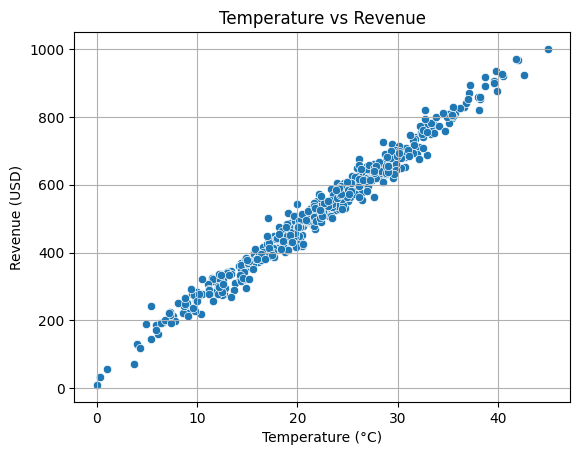

In [12]:
sns.scatterplot(data=df, x='Temperature', y='Revenue')
plt.title("Temperature vs Revenue")
plt.xlabel("Temperature (°C)")
plt.ylabel("Revenue (USD)")
plt.grid(True)
plt.show()

In [13]:
print("\nCorrelation between Temperature and Revenue:")
print(df.corr())


Correlation between Temperature and Revenue:
             Temperature   Revenue
Temperature     1.000000  0.989841
Revenue         0.989841  1.000000


In [15]:
X = df[['Temperature']]
y = df['Revenue']

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

In [20]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

In [23]:
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"Model: {model_name}")
    print(f"Mean Squared Error: {mse}")
    print(f"R2 Score: {r2}")


In [24]:
evaluate_model(y_test, lr_preds, "Linear Regression")
evaluate_model(y_test, dt_preds, "Decision Tree Regressor")

Model: Linear Regression
Mean Squared Error: 652.4938284912412
R2 Score: 0.9771509516333023
Model: Decision Tree Regressor
Mean Squared Error: 1111.9149305555557
R2 Score: 0.9610629297649239


In [25]:
print("\nLinear Regression Coefficient and Intercept:")
print(f"  Coefficient (slope): {lr_model.coef_[0]:.2f}")
print(f"  Intercept: {lr_model.intercept_:.2f}")


Linear Regression Coefficient and Intercept:
  Coefficient (slope): 21.38
  Intercept: 46.18
